# Step 3.1: Experiment II: Machine Learning

---

## 1. Imports

In [1]:
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import math

In [3]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import random
import matplotlib.pyplot as plt #gráficos
import seaborn as sns
import joblib

In [4]:
from sklearn import naive_bayes
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [5]:
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score

---

## 2. Load the Standardized Dataset

In [6]:
dataframe = pd.read_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Standardized\SDatasetExp2.csv", delimiter = ",")

In [7]:
dataframe.head(2)

,Avg_bps,Avg_pps,Bytes,p2_ib,number_sp,First_Protocol,number_dp,duration,first_sp,p1_ib,Netflows,p3_ib,p3_d,Type
0,3.648682,1.709091,3.909294,0.358354,0.427350,4,0.418605,0.758039,443,0.111111,-0.059150,1.697374,1.507954,0
1,1.062768,0.372727,1.133784,0.135593,0.709402,4,0.725581,0.430744,443,0.222222,0.295749,1.822815,0.111537,0


In [8]:
dataframe.shape

(2363, 14)

---

## 3. Let's Split the data

In [9]:
x = dataframe.iloc[:,:-1]
y = dataframe['Type']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)

In [11]:
print(X_train.shape)
print(y_train.shape)

(1654, 13)
(1654,)


In [12]:
print(X_test.shape)
print(y_test.shape)

(709, 13)
(709,)


In [13]:
y_test = y_test.astype(np.int64)

---

## 4. Let's create a Dataframe to save the Accuracies...

In [14]:
acc_Machine_Learning = pd.DataFrame(columns=["Name","Accuracy_Value","CV","Type","Kappa"])

---

---

## 5. :::::::: MACHINE LEARNING ::::::::

In [15]:
x = X_train
y = y_train

#### 5.1 Gaussian Naive Bayes

##### Train

In [16]:
gnb = naive_bayes.GaussianNB()
params = {}

In [17]:
gscv_gnb = GridSearchCV(gnb, params, cv=10, return_train_score=True)
gscv_gnb.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs', refit=True,
             return_train_score=True, scoring=None, verbose=0)

In [18]:
gscv_gnb.cv_results_

{'mean_fit_time': array([0.00253899]),
 'std_fit_time': array([0.00064215]),
 'mean_score_time': array([0.00106661]),
 'std_score_time': array([0.00029529]),
 'params': [{}],
 'split0_test_score': array([0.90361446]),
 'split1_test_score': array([0.87349398]),
 'split2_test_score': array([0.90361446]),
 'split3_test_score': array([0.87951807]),
 'split4_test_score': array([0.87272727]),
 'split5_test_score': array([0.85454545]),
 'split6_test_score': array([0.86666667]),
 'split7_test_score': array([0.87878788]),
 'split8_test_score': array([0.85454545]),
 'split9_test_score': array([0.92727273]),
 'mean_test_score': array([0.8814994]),
 'std_test_score': array([0.02212054]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.87567204]),
 'split1_train_score': array([0.88642473]),
 'split2_train_score': array([0.87567204]),
 'split3_train_score': array([0.87836022]),
 'split4_train_score': array([0.89321692]),
 'split5_train_score': array([0.88448623]),
 'split6_train_scor

The **best_score (Mean cross-validated score of the best_estimator)** is :

In [19]:
gscv_gnb.best_score_

0.8814993954050786

The **best estimator (model)** is :

In [20]:
gnb = gscv_gnb.best_estimator_
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : gnb 
                                                   , 'Accuracy_Value' : gscv_gnb.best_score_
                                                   , 'CV' : 10
                                                   , 'Type' : 'TRAIN'}, 
                                           ignore_index=True)

In [22]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN


##### Test

In [23]:
y_pred= gnb.predict(X_test)

In [24]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 342, 1: 367}

In [25]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 281, 1: 428}

([<matplotlib.axis.YTick at 0x2a560532208>,
 <a list of 2 Text yticklabel objects>)

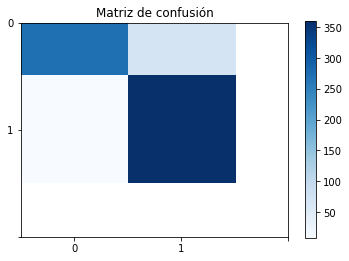

In [26]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) 
plt.yticks(tick_marks, ['0','1'])

In [27]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       342
           1       0.84      0.98      0.91       367

    accuracy                           0.89       709
   macro avg       0.91      0.89      0.89       709
weighted avg       0.91      0.89      0.89       709



---

In [28]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : gnb
                                                  , 'Accuracy_Value': accuracy_score(y_test,y_pred) 
                                                  , 'CV' : 10
                                                  , 'Type' : 'TEST'
                                                  , 'Kappa' : cohen_kappa_score(y_test, y_pred)}, 
                                           ignore_index=True)

In [29]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876


---

#### 5.2 Decision Tree Classifier

##### Train

In [30]:
dtc = tree.DecisionTreeClassifier(random_state=1234)
tree_params = {'criterion':['gini','entropy'],
               'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
               'max_leaf_nodes': list(range(2, 100)),
               'min_samples_split': [2, 3, 4]}

In [31]:
gscv_dtc = GridSearchCV(dtc, tree_params, cv=10)
gscv_dtc.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1234,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20,

The **best_score (Mean cross-validated score of the best_estimator)** is :

In [32]:
gscv_dtc.best_score_

0.9945586457073761

The **best estimator (model)** is :

In [33]:
dtc = gscv_dtc.best_estimator_
dtc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [34]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : dtc, 'Accuracy_Value' : gscv_dtc.best_score_
                                                   ,'CV' : 10
                                                   ,'Type' : 'TRAIN'},
                                                   ignore_index=True)

In [35]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN


##### Test

In [36]:
y_pred= dtc.predict(X_test)

In [37]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 342, 1: 367}

In [38]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 349, 1: 360}

([<matplotlib.axis.YTick at 0x2a5608cbb08>,
 <a list of 2 Text yticklabel objects>)

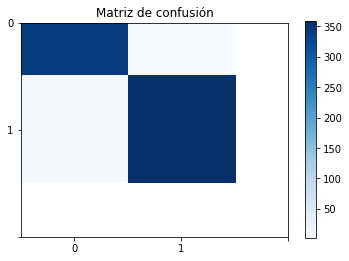

In [39]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) 
plt.yticks(tick_marks, ['0','1'])

In [40]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       342
           1       1.00      0.98      0.99       367

    accuracy                           0.99       709
   macro avg       0.99      0.99      0.99       709
weighted avg       0.99      0.99      0.99       709



---

In [41]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : dtc
                                                  , 'Accuracy_Value': accuracy_score(y_test,y_pred) 
                                                  , 'CV' : 10
                                                  , 'Type' : 'TEST'
                                                  , 'Kappa' : cohen_kappa_score(y_test, y_pred)}, 
                                                   ignore_index=True)

In [42]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598


---

#### 5.3 KNN

##### Train

In [43]:
knn =  KNeighborsClassifier()
knn_params = {'n_neighbors':[1,3,5], 
              'weights' : ['uniform','distance'], 
              'metric':['euclidean','manhattan']
             }


In [44]:
gscv_knn = GridSearchCV(knn, knn_params, cv=10)
gscv_knn.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The **best_score (Mean cross-validated score of the best_estimator)** is :

In [45]:
gscv_knn.best_score_

0.9951632406287787

The **best estimator (model)** is :

In [46]:
knn = gscv_knn.best_estimator_
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [47]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : knn
                                                   ,'Accuracy_Value' : gscv_knn.best_score_
                                                   , 'CV' :10
                                                   , 'Type' : 'TRAIN'}, 
                                           ignore_index=True)

In [48]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN


##### Test

In [49]:
y_pred= knn.predict(X_test)

In [50]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 342, 1: 367}

In [51]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 343, 1: 366}

([<matplotlib.axis.YTick at 0x2a5605b5388>,
 <a list of 2 Text yticklabel objects>)

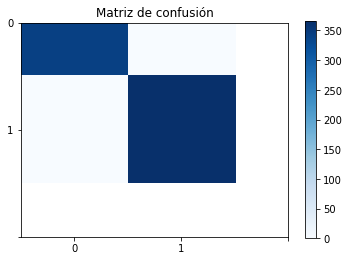

In [52]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) 
plt.yticks(tick_marks, ['0','1'])

In [53]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       367

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709



---

In [54]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : knn
                                                   , 'Accuracy_Value': accuracy_score(y_test,y_pred) 
                                                   , 'CV' : 10
                                                   , 'Type' : 'TEST'
                                                   , 'Kappa' : cohen_kappa_score(y_test, y_pred)}, 
                                                   ignore_index=True)

In [55]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176


---

#### 5.4 Logistic Regression

##### Train

In [56]:
logreg = linear_model.LogisticRegression()
params = {}

In [57]:
gscv_lg = GridSearchCV(logreg, params, cv=10)
gscv_lg.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

The **best_score (Mean cross-validated score of the best_estimator)** is :

In [58]:
gscv_lg.best_score_

0.9885126964933495

The **best estimator (model)** is :

In [59]:
logreg = gscv_lg.best_estimator_
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : logreg
                                                   , 'Accuracy_Value' : gscv_lg.best_score_
                                                   , 'CV' :10
                                                   , 'Type' : 'TRAIN'}
                                                  , ignore_index=True)

In [61]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176
6,"LogisticRegression(C=1.0, class_weight=None, d...",0.988513,10,TRAIN,NaN


##### Test

In [62]:
y_pred= logreg.predict(X_test)

In [63]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 342, 1: 367}

In [64]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 345, 1: 364}

([<matplotlib.axis.YTick at 0x2a560a79888>,
 <a list of 2 Text yticklabel objects>)

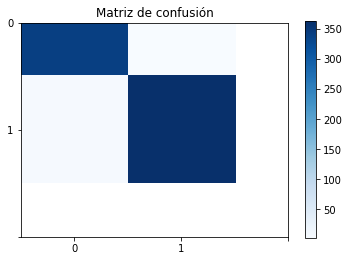

In [65]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) 
plt.yticks(tick_marks, ['0','1'])

In [66]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       342
           1       1.00      0.99      0.99       367

    accuracy                           0.99       709
   macro avg       0.99      0.99      0.99       709
weighted avg       0.99      0.99      0.99       709



---

In [67]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : logreg
                                                   , 'Accuracy_Value': accuracy_score(y_test,y_pred) 
                                                   , 'CV' : 10
                                                   , 'Type' : 'TEST'
                                                   , 'Kappa' : cohen_kappa_score(y_test, y_pred)}, 
                                                   ignore_index=True)

In [68]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176
6,"LogisticRegression(C=1.0, class_weight=None, d...",0.988513,10,TRAIN,NaN
7,"LogisticRegression(C=1.0, class_weight=None, d...",0.992948,10,TEST,0.985882


---

#### 5.5 Random Forest Classifier

##### Train

In [69]:
clf = RandomForestClassifier(random_state=1234)
clf_param = { 
    'n_estimators': [64, 128],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion' :['gini', 'entropy']}

In [70]:
gscv_rfc = GridSearchCV(clf, clf_param, cv=10)
gscv_rfc.fit(x,y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=1234, verbose=0,
                                              warm_start=False),
             ii

The **best_score (Mean cross-validated score of the best_estimator)** is :

In [71]:
gscv_rfc.best_score_

0.9969770253929867

The **best estimator (model)** is :

In [72]:
clf = gscv_rfc.best_estimator_
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [73]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : clf
                                                   ,'Accuracy_Value' : gscv_rfc.best_score_
                                                   ,'CV' :10
                                                   ,'Type' : 'TRAIN'}
                                                   , ignore_index=True)

In [74]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176
6,"LogisticRegression(C=1.0, class_weight=None, d...",0.988513,10,TRAIN,NaN
7,"LogisticRegression(C=1.0, class_weight=None, d...",0.992948,10,TEST,0.985882
8,"(DecisionTreeClassifier(class_weight=None, cri...",0.996977,10,TRAIN,NaN


##### Test

In [75]:
y_pred= clf.predict(X_test)

In [76]:
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 342, 1: 367}

In [77]:
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 343, 1: 366}

([<matplotlib.axis.YTick at 0x2a560915788>,
 <a list of 2 Text yticklabel objects>)

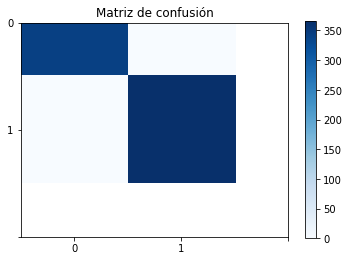

In [78]:
cm= metrics.confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['0','1']) 
plt.yticks(tick_marks, ['0','1'])

In [79]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       342
           1       1.00      1.00      1.00       367

    accuracy                           1.00       709
   macro avg       1.00      1.00      1.00       709
weighted avg       1.00      1.00      1.00       709



---

In [80]:
acc_Machine_Learning= acc_Machine_Learning.append({'Name' : clf
                                                   , 'Accuracy_Value': accuracy_score(y_test,y_pred) 
                                                   , 'CV' : 10
                                                   , 'Type' : 'TEST'
                                                   , 'Kappa' : cohen_kappa_score(y_test, y_pred)}, 
                                                   ignore_index=True)

In [81]:
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176
6,"LogisticRegression(C=1.0, class_weight=None, d...",0.988513,10,TRAIN,NaN
7,"LogisticRegression(C=1.0, class_weight=None, d...",0.992948,10,TEST,0.985882
8,"(DecisionTreeClassifier(class_weight=None, cri...",0.996977,10,TRAIN,NaN
9,"(DecisionTreeClassifier(class_weight=None, cri...",0.998590,10,TEST,0.997176


---

## 6. Let's save the accuracies

In [82]:
acc_Machine_Learning = acc_Machine_Learning.sort_values(by=['Accuracy_Value'], ascending=False)
acc_Machine_Learning

,Name,Accuracy_Value,CV,Type,Kappa
5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.998590,10,TEST,0.997176
9,"(DecisionTreeClassifier(class_weight=None, cri...",0.998590,10,TEST,0.997176
8,"(DecisionTreeClassifier(class_weight=None, cri...",0.996977,10,TRAIN,NaN
4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.995163,10,TRAIN,NaN
2,"DecisionTreeClassifier(class_weight=None, crit...",0.994559,10,TRAIN,NaN
7,"LogisticRegression(C=1.0, class_weight=None, d...",0.992948,10,TEST,0.985882
6,"LogisticRegression(C=1.0, class_weight=None, d...",0.988513,10,TRAIN,NaN
3,"DecisionTreeClassifier(class_weight=None, crit...",0.987306,10,TEST,0.974598
1,"GaussianNB(priors=None, var_smoothing=1e-09)",0.894217,10,TEST,0.786876
0,"GaussianNB(priors=None, var_smoothing=1e-09)",0.881499,10,TRAIN,NaN


In [83]:
acc_Machine_Learning.to_csv(r"C:\Users\Usuario\Documents\Github\PDG\PDG-2\Datasets\Time Window\Accuracies\MLAccuraciesExp2.csv",sep=',',index=False)

---

## 7. Let's choose the best ML Algorithm

In [84]:
acc_Machine_Learning.iloc[1,:]

Name              (DecisionTreeClassifier(class_weight=None, cri...
Accuracy_Value                                              0.99859
CV                                                               10
Type                                                           TEST
Kappa                                                      0.997176
Name: 9, dtype: object

---

## 8. Let's save the 3 best models...

In [85]:
joblib.dump(clf,"./Models/rfc.save")

['./Models/rfc.save']

In [86]:
joblib.dump(dtc,"./Models/dtc.save")

['./Models/dtc.save']

In [87]:
joblib.dump(knn,"./Models/knn.save")

['./Models/knn.save']

In [88]:
joblib.dump(logreg,"./Models/logreg.save")

['./Models/logreg.save']

---

---

----

## References

### Naive

1. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
2. https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
3. https://stackoverflow.com/questions/58212613/naive-bayes-gaussian-throwing-valueerror-could-not-convert-string-to-float-m
4. https://scikit-learn.org/stable/modules/naive_bayes.html
5. https://scikit-learn.org/stable/modules/model_evaluation.html

### Decision Tree

1. https://stackoverflow.com/questions/35097003/cross-validation-decision-trees-in-sklearn
2. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### Label Encoder

1. https://www.interactivechaos.com/python/function/labelencoder

### KNN

1. https://medium.com/@svanillasun/how-to-deal-with-cross-validation-based-on-knn-algorithm-compute-auc-based-on-naive-bayes-ff4b8284cff4